# Chatbot for Computable Biomedical Knowledge Artifact Retrieval and Execution, Using Retrieval-Augmented Generation with a Large Language Model

## Introduction
Ensuring quick and reliable access to biomedical knowledge is a crucial yet complex challenge in healthcare
and research. Healthcare professionals need accurate, evidence-based information at their fingertips to make informed clinical decisions. Researchers require access to a wide variety of CBK artifacts  to complete innovative studies. Patients seek understandable, trustworthy health information to manage their conditions and make informed decisions about their care.

However, the vast and growing amount of biomedical knowledge, coupled with the intricacies of making it computable, creates significant barriers to effective information retrieval and utilization. Current systems often fall short in providing seamless access to relevant, high-quality information quickly and efficiently. Central to this is the use of computable biomedical knowledge artifacts or objects (CBKs), packaged with metadata and representations of actionable knowledge that can be executed by machines.

To explore new potentials for addressing  these challenges, we created a chatbot that leverages retrieval augmented generation (RAG) with a large language model (ChatGPT).

## Retrieval Augmented Generation (RAG)
RAG is used in this study to augment LLM responses with content about specific CBK artifacts, allowing the chatbot to answer questions about these CBKs:

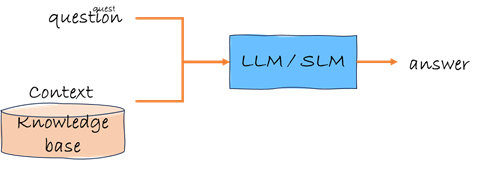

However, the data that could be provided as context to answer a question, using RAG, is limited in the number of tokens. Different models have their own limitations. Here are some examples:

\begin{array}{|l|c|}
\hline
\textbf{Model}        & \textbf{Maximum Tokens} \\ \hline
\text{GPT-3.5 Turbo}        & 16,384                  \\ \hline
\text{GPT-4}          & 8,192                  \\ \hline
\text{GPT-4 Turbo, GPT-4o, GPT-4o-mini}    & 128,000                 \\ \hline
\end{array}

"tokens" are units of text that can be as short as one character or as long as one word, depending on the language and the specific tokenization algorithm used by the model.
These limitations make it impossible for most use cases to provide the entire knowledge base as one context to the LLM to answer each question. Also, the cost of processing each query (question, context) is calculated based on the number of tokens in the context. To address the issue of limited context and to reduce the cost of answering each question, usually the data is split into smaller chunks. Then to answer each question, the most relevant chunks of data are selected and sent as the context. In this use case, each CBK (code and metadata) could be considered as a chunk:

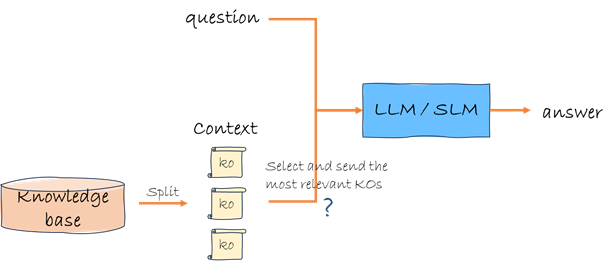

To find the most relevant chunks of data (KOs), an embedding, which is a vector with hundreds of dimensions, is created for each chunk of data and also the user's question. The question embedding is compared against the embeddings using similarity search techniques like cosine similarity or Euclidean distance to find the most similar (relevant) chunks of data to the question. These embeddings could be generated once for each chunk of data and stored in a vector store which is a database for embedding vectors. The vectore store could then be used to find the most similar embeddings to a given vector:

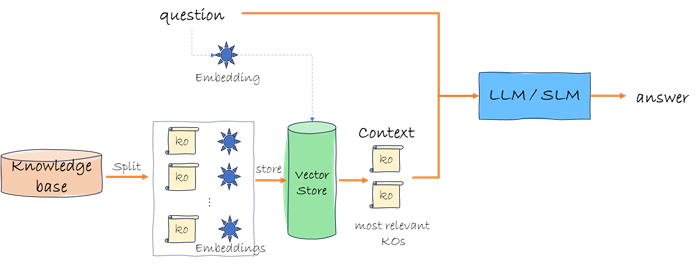


## Chatbot Client
Chatbot client uses RAG with LLM in an itterative process to engage in a conversation with the user to answer questions about CBKs. CBKs include both metadata and code artifacts (knowledge representation). In each itteration the chatbot sends a prompt to LLM which include the context files stored in a vectore store, set of instructions, history of the conversation and the user question. LLM responds to the question using its augmented knowledge. Depending on the nature of the questions, LLM may indicate that CBK artifact may need to be used to calculate values based on user inputs. The chatbot will analyse the LLM response in each itteration and may use a code interpreter assistant model to execute the code if needed:

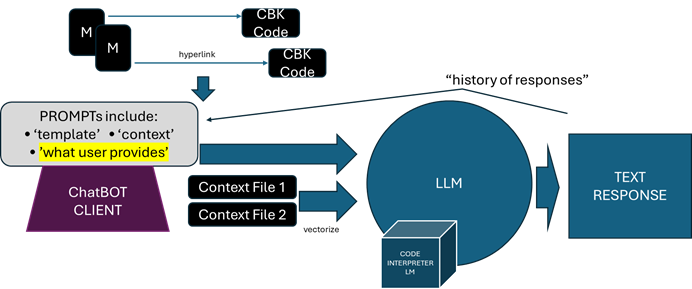




### Install dependencies and import libraries
Langchain is used as the main framework to build the chatbot client app utilizing Large Language Models (LLM) with Retrieval-Augmented Generation (RAG).
The following libraries are required:
*   **langchain:** A framework for developing applications powered by language models, which helps in handling chains, prompts, and output parsing.
*   **langchain-community:** Contains community-contributed tools such as document loaders and vector store integrations.
*   **docarray:** Handles efficient, in-memory storage of embeddings for fast retrieval, essential for RAG implementations.
*   **openai:** Provides the interface to interact with OpenAI's LLM tools, like code assistant.
*   **tiktoken:** Efficient tokenization library to ensure input/output limits for LLM models.

In addition, standard Python libraries like json, os, and re are used for handling data, environment configuration, and regular expressions. The app also utilizes openai to access models, dotenv for environment management, and requests for HTTP requests.

Use the following code to install dependencies:

In [1]:
!pip install python-dotenv langchain langchain-community docarray openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 947.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

Use the following code to import required libraries:

In [2]:
import json
import os
import re
from collections import deque

import openai
import requests
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.schema import Document
from google.colab import userdata
from google.colab import userdata

## Set OpenAI API key, LLM / SLM model
You have the option to use either GPT-4o (a large language model, LLM) or GPT-4o-mini (a smaller language model, SLM) for the model.

For your convenience, I have provided my OpenAI API key in this notebook, allowing you to run the code without any additional setup. However, if you prefer to use your own API key, you can easily [create your own OpenAI API key](https://platform.openai.com/api-keys) and set an environment variable named OPENAI_API_KEY.

Please note that each conversation incurs a small cost (a few cents). If you choose to use your own API key, you can [fund your OpenAI account](https://platform.openai.com/settings/organization/billing/overview) with a specified amount and [monitor your usage](https://platform.openai.com/usage) to keep track of the charges.

In [3]:
load_dotenv()
os.environ['OPENAI_API_KEY'] = "*** Your OpenAI API key ***" #userdata.get('OPENAI_API_KEY')
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
model_name = "gpt-4o-mini"
openai.api_key = OPENAI_API_KEY

## Initialize the language model

In [4]:
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model=model_name)

<ipython-input-4-56421286b20b>:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model=model_name)


## Initialize embeddings and vector store
The metadata links for knowledge objects are listed in the manifest. The chatbot loads each metadata file and its related CBK artifact and creates a context file. These context files are then vectorised and kept in a vector store.

In [5]:

embeddings = OpenAIEmbeddings()
manifest = ["https://raw.githubusercontent.com/kgrid-lab/LLM_with_RAG_chatbot/refs/heads/main/KO/alcohol.json",
            "https://raw.githubusercontent.com/kgrid-lab/LLM_with_RAG_chatbot/refs/heads/main/KO/tobacco.json"]
splits = []
for file_url in manifest:
    response = requests.get(file_url)
    data = response.text

    # Assuming the file contains JSON content
    code_file = json.loads(data)

    # Create a Document object
    ko = Document(page_content=data,metadata={'source': file_url})

    # Get the link to the implementedBy field
    link = code_file["koio:hasKnowledge"]["implementedBy"]
    function_response = requests.get(link)
    function_data = function_response.text

    # Append function code to the ko content
    ko.page_content += (
        "\nHere is the function to calculate the value for this knowledge object: \n"
        + function_data
    )
    splits.append(ko)
vectorstore = DocArrayInMemorySearch.from_documents(splits, embeddings)


<ipython-input-5-3832f97a65e3>:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()
/usr/local/lib/python3.10/dist-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


## Create the Chain
The following code creates a LangChain pipeline to process a query using a chain of operations. The chain begins by preparing inputs:
*   "context": it retrieves relevant context from the vector store by searching for the top 2 most similar documents based on the question.
*   "question": question simply passed through without modification.

These inputs are then passed to prompt (a ChatPromptTemplate), which formats the retrieved context and the question into the pre-defined template which includes instruction for LLM as well. This creates a structured input that the language model can interpret.

The formatted prompt is then fed into the model (a language model such as GPT) to generate a response based on the given context and question.

Finally, the output generated by the model is passed to parser (a StrOutputParser), which processes and parses the raw model output into a more structured or usable format, such as a string or a specific data structure.

The entire pipeline allows you to automate the process of retrieving relevant information, formatting a prompt, querying a model, and parsing the response in one continuous flow.

In [6]:
template = """
You will answer user questions with the help of computable biomedical knowledge objects.
You may prepare and return the code attached to a context that could be executed by the chatbot to prepare response for the user.
If the user is asking to calculate something, do not calculate it. Instead follow these steps:
1. Find the code that could calculate what the user is asking.
2. Identify what parameters that code requires.
3. If the user's responses include values for all these parameters, return the code with these values immediately. Otherwise, ask the user for the missing values.

Context: {context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
parser = StrOutputParser()
chain = (
    {"context": vectorstore.as_retriever(search_kwargs={"k": 2}), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)

# example usage:
chain.invoke("Name one of the knowledge objects you have loaded as context?")


'One of the knowledge objects loaded as context is the "Quality-Adjusted Life Year Gain By Tobacco Cessation."'

## Set up OpenAI code_interpreter Assistants API
A code_interpreter assistant is used by the chatbot as a tool to execute CBK artifacts. This code creates the assistant and use it to implement a function that executes the code.

In [7]:
assistant = openai.beta.assistants.create(
    name="Code Executor",
    instructions="You are a code executor. Execute the provided code and return the response.",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4o-mini",
)

def execute_code_with_assistant(code):
    client = openai.OpenAI()
    thread = client.beta.threads.create()
    message = client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=code,
    )
    run = client.beta.threads.runs.create_and_poll(
        thread_id=thread.id,
        assistant_id=assistant.id,
        instructions="Please execute the provided code and use the result value together with the narrative part to answer the question. Do not mention that you executed code to provide the response.",
    )

    if run.status == "completed":
        messages = client.beta.threads.messages.list(thread_id=thread.id)
        result = ""
        for message in messages:
            if message.role == "assistant" and message.content[0].type == "text":
                result = message.content[0].text.value
        return result
    else:
        return "Code execution failed."

# example usage:
execute_code_with_assistant(
      """"
      # Variables for weight (in kg) and height (in meters)
      weight = 70  # Example weight
      height = 1.75  # Example height

      # Calculate BMI
      bmi = weight / (height ** 2)
      """
      )


'The calculated Body Mass Index (BMI) for a weight of 70 kg and a height of 1.75 meters is approximately 22.86. This value falls within the normal weight range according to the BMI classification.'

## Create function to prepare history of the conversation
This function puts together the new query and the history of the conversation which is stored in an array.

In [8]:
def get_full_conversation(conversation_history, current_query):
    history_text = "\n".join([f"User: {q}\nBot: {a}" for q, a in conversation_history])
    full_conversatsion = f"{history_text}\nUser: {current_query}\nBot:"
    return full_conversatsion

# example usage
history = [("How can you help me?", "I can answer your CBK related questions"),
 ("What CBKs do you have loaded as context?","tobacco and alcohol")
]
question = "what is the version of tobacco CBK you use?"
print(get_full_conversation(history, question))

User: How can you help me?
Bot: I can answer your CBK related questions
User: What CBKs do you have loaded as context?
Bot: tobacco and alcohol
User: what is the version of tobacco CBK you use?
Bot:


## Create the function to process each question
This function receives the new question and the conversation history. Then it queries the LLM and if the response requires code execution, it will execute the code before returning the response.

In [ ]:
def process(text, conversation_history):
    full_conversatsion = get_full_conversation(conversation_history, text)
    response = chain.invoke(full_conversatsion)
    code = (
        re.search(r"```(.*?)```", response, re.DOTALL).group(1)
        if "```" in response
        else ""
    )
    if code:
        print("I am processing your request, this may take a few seconds...")
        execution_result = execute_code_with_assistant(response)
        return execution_result
    else:
        return response

# example usage:
process("what are the input parameters of the CBK we just talked about?", history)

'The input parameters for the tobacco CBK (Quality-Adjusted Life Year Gain By Tobacco Cessation) are as follows:\n\n1. **smokeyear** (int): Number of years since the individual began smoking.\n2. **quityear** (int): Number of years since the individual quit smoking. If the person is currently smoking, this should be 0.\n3. **cigperday** (int): Average number of cigarettes smoked per day.\n4. **age** (int): Age of the individual in years.\n5. **gender** (int): Gender of the individual (0 for female, 1 for male).'

## Create the conversation loop
This is the main loop of the app which receives each question and calls the process method for processing. This code handles the history of the conversation adding new communication to an array and removing the old ones (maximum number of communications kept as part of the history is set to 10).

Execute this code and start asking questions like:
*   How can you help me?
*   Can you calculate my life year gain if I stop using tobacco, considering I am a 65 years old female who has been smoking for 10 years and I still smoke and I smoke 5 cigarettes a day?
*   What if I was 40 years old with the same characteristics?
*   What version of tobacco knowledge object did you use?
*   Where is the knowledge representation of this KO located?
*   What is the purpose of the tobacco KO?
*   Can you provide some information on the license of this KO?
*   What input parameters are required to calculate QALY gain from stopping tobacco use?


In [ ]:
def main():
    # Store the conversation history
    conversation_history = deque(maxlen=10)

    while True:
        text = input("Enter your query: --> ")
        response = process(text, conversation_history)
        print(response)
        code = (
            re.search(r"```(.*?)```", response, re.DOTALL).group(1)
            if "```" in response
            else ""
        )
        conversation_history.append(
            (text, response.replace(code, ""))
        )  # update history excluding code


if __name__ == "__main__":
    main()



Enter your query: --> Can you calculate my life year gain if I stop using tobacco, considering I am a 65 years old female who has been smoking for 10 years and I still smoke and I smoke 5 cigarettes a day?
I am processing your request, this may take a few seconds...
Your estimated Quality-Adjusted Life Year (QALY) gain from stopping tobacco use is approximately 5.32 years. This indicates that if you were to quit smoking, you could potentially gain about 5.32 additional years of healthy life.
Enter your query: --> What if I was 40 years old with the same characteristics?
I am processing your request, this may take a few seconds...
Based on the provided calculations, your estimated Quality-Adjusted Life Year (QALY) gain from stopping tobacco use is approximately **8.55 years**. This suggests that quitting smoking could significantly enhance your quality of life and longevity.
